In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE


#### Importing the data

In [2]:
df = pd.read_csv('Data/final17_dataset.csv')

#### Removing NaN

In [3]:
dfsales = df.dropna()
dfsales.shape

(111, 171)

In [4]:
dfsales.head()

,LGA_CODE,LGA_NAME,s_mean_nonstrata,s_mean_strata,s_median_nonstrata,s_median_strata,s_mean_sales,s_median_sales,r_one_br,r_two_br,...,ntl17_count,ntl17_min,ntl17_mean,ntl17_max,ntl17_sum,ntl19_count,ntl19_min,ntl19_mean,ntl19_max,ntl19_sum
0,LGA10050,Albury,350.72904,197.23513,320.0,206.0,320.42552,290.0,162.5,220.0,...,1766,0.14,2.375328,59.139999,4194.830078,1766,0.20,2.501557,56.820000,4417.750000
1,LGA10130,Armidale Regional,372.99474,0.00000,352.5,0.0,361.56796,345.0,170.0,240.0,...,46613,-0.01,0.210830,34.509998,9827.399414,46614,0.05,0.234065,41.060001,10910.721680
2,LGA10250,Ballina,695.14002,463.46875,639.5,424.0,616.27321,587.5,240.0,360.0,...,2576,0.09,0.619946,20.860001,1596.979980,2576,0.13,0.650873,23.889999,1676.650024
4,LGA10470,Bathurst Regional,436.94776,293.44444,417.0,280.0,426.22967,405.0,190.0,270.0,...,21325,0.06,0.334099,48.869999,7124.670410,21325,0.08,0.371763,46.009998,7927.839844
5,LGA10550,Bega Valley,480.04897,292.83431,460.0,285.0,431.58223,420.0,205.0,270.0,...,36524,0.03,0.198827,18.240000,7261.970215,36524,0.12,0.269662,14.730000,9849.149414


#### Adding additional columns based on land area

In [5]:
dfsales['ntl17_mean_per_land_area'] = dfsales.ntl17_sum / dfsales.land_area
dfsales['bstop_per_land_area'] = dfsales.bus_stop / dfsales.land_area
dfsales['tstation_per_land_area'] = dfsales.train_station / dfsales.land_area
dfsales['transpo_per_land_area'] = dfsales.all_transpo / dfsales.land_area
dfsales.head()

/Users/jeromeroosan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jeromeroosan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jeromeroosan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,LGA_CODE,LGA_NAME,s_mean_nonstrata,s_mean_strata,s_median_nonstrata,s_median_strata,s_mean_sales,s_median_sales,r_one_br,r_two_br,...,ntl17_sum,ntl19_count,ntl19_min,ntl19_mean,ntl19_max,ntl19_sum,ntl17_mean_per_land_area,bstop_per_land_area,tstation_per_land_area,transpo_per_land_area
0,LGA10050,Albury,350.72904,197.23513,320.0,206.0,320.42552,290.0,162.5,220.0,...,4194.830078,1766,0.20,2.501557,56.820000,4417.750000,13.711019,0.294170,0.003269,0.297438
1,LGA10130,Armidale Regional,372.99474,0.00000,352.5,0.0,361.56796,345.0,170.0,240.0,...,9827.399414,46614,0.05,0.234065,41.060001,10910.721680,1.139977,0.001972,0.000116,0.002436
2,LGA10250,Ballina,695.14002,463.46875,639.5,424.0,616.27321,587.5,240.0,360.0,...,1596.979980,2576,0.13,0.650873,23.889999,1676.650024,3.293157,0.123727,0.000000,0.138162
4,LGA10470,Bathurst Regional,436.94776,293.44444,417.0,280.0,426.22967,405.0,190.0,270.0,...,7124.670410,21325,0.08,0.371763,46.009998,7927.839844,1.866140,0.035622,0.000262,0.037455
5,LGA10550,Bega Valley,480.04897,292.83431,460.0,285.0,431.58223,420.0,205.0,270.0,...,7261.970215,36524,0.12,0.269662,14.730000,9849.149414,1.156571,0.012582,0.000000,0.013697


### Analysis of the house sales of all types of houses

#### Defining column sets and data frame for analysis

In [6]:
lgacols = ['LGA_CODE','LGA_NAME']
agecols = ['Age_below_15_yr','Age_15_64_yr','Age_over_65_yr']
ageperccols = ['Age_15_64_yr_perc']
birthplcols = ['BP_Aus','BP_Non_Aus']
birthplperccols = ['BP_Aus_Perc','BP_Non_Aus_Perc']
educols = ['SE_Yr10_above','SE_Yr9_below']
eduperccols = ['SE_Yr10_above_Perc']
maritalstatcols = ['MS_Married','MS_Separated','MS_Divorced','MS_Widowed','MS_Never_Married','MS_Single']
maritalstatperccols = ['MS_Married_Perc','MS_Separated_Perc','MS_Divorced_Perc','MS_Widowed_Perc','MS_Never_Married_Perc','MS_Single_Perc']
incomecols = ['Median_tot_prsnl_inc_weekly','Median_tot_fam_inc_weekly','Median_tot_hhd_inc_weekly']
othercensuscols = ['Median_age_persons','Average_household_size']
transportcols = ['bstop_per_land_area','tstation_per_land_area']
ntlightcols = ['ntl17_mean_per_land_area']
salecols = ['s_median_sales']

In [7]:
censuscols = ageperccols + birthplperccols + eduperccols + maritalstatperccols + incomecols + othercensuscols
featurecols = censuscols + transportcols + ntlightcols

#### Analysing the data of responses to find outliers

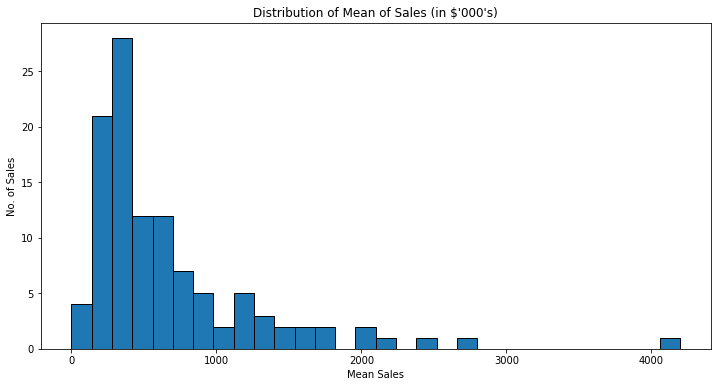

In [8]:
plt.figure(figsize=(12,6))
plt.hist(dfsales['s_mean_sales'], edgecolor = 'black', bins = 30)
plt.xlabel("Mean Sales")
plt.ylabel("No. of Sales")
plt.title("Distribution of Mean of Sales (in $'000's)")
plt.show()

[Text(0.5, 0, 'Mean Sales')]

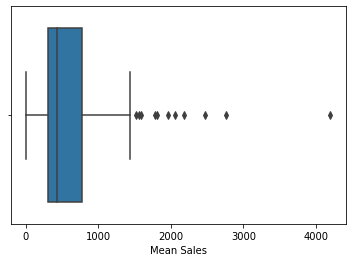

In [9]:
ax = sns.boxplot(dfsales.s_mean_sales)
ax.set(xlabel = 'Mean Sales')

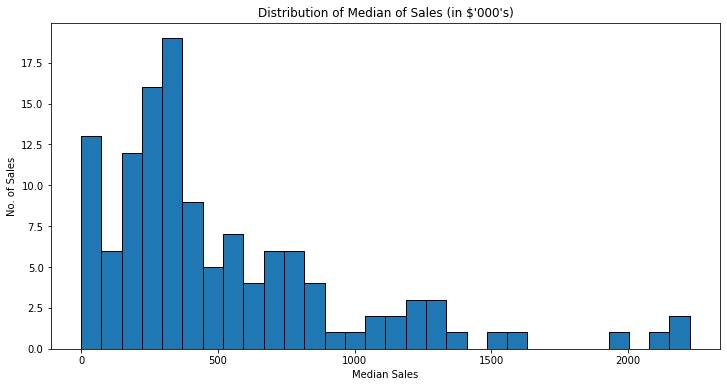

In [10]:
plt.figure(figsize=(12,6))
plt.hist(df['s_median_sales'], edgecolor = 'black', bins = 30)
plt.xlabel("Median Sales")
plt.ylabel("No. of Sales")
plt.title("Distribution of Median of Sales (in $'000's)")
plt.show()

In [11]:
dfsales.s_median_sales.describe()

count     111.000000
mean      581.833230
std       455.236874
min         0.000000
25%       283.750000
50%       420.000000
75%       747.750000
max      2225.000000
Name: s_median_sales, dtype: float64

[Text(0.5, 0, 'Median Sales')]

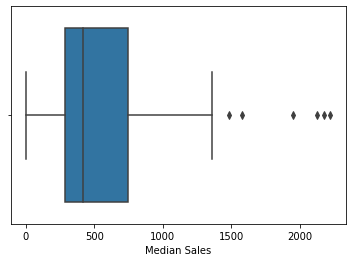

In [11]:
ax = sns.boxplot(dfsales.s_median_sales)
ax.set(xlabel = 'Median Sales')

#### Comparing each type of data to visualise the relationships

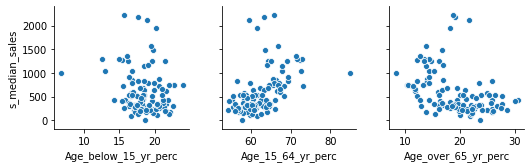

In [12]:
age = sns.pairplot(dfsales, 
                   x_vars=['Age_below_15_yr_perc','Age_15_64_yr_perc','Age_over_65_yr_perc'], 
                   y_vars=['s_median_sales'])

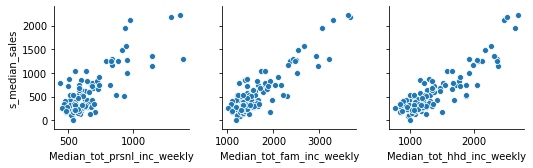

In [13]:
income = sns.pairplot(dfsales, 
                      x_vars=['Median_tot_prsnl_inc_weekly','Median_tot_fam_inc_weekly','Median_tot_hhd_inc_weekly'], 
                      y_vars=['s_median_sales'])

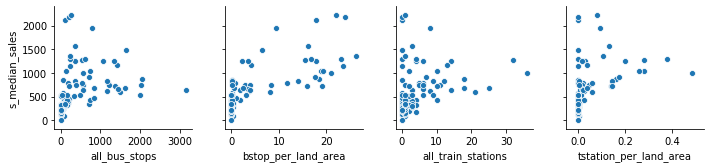

In [14]:
transp = sns.pairplot(dfsales, 
                      x_vars=['all_bus_stops','bstop_per_land_area','all_train_stations','tstation_per_land_area'], 
                      y_vars=['s_median_sales'])

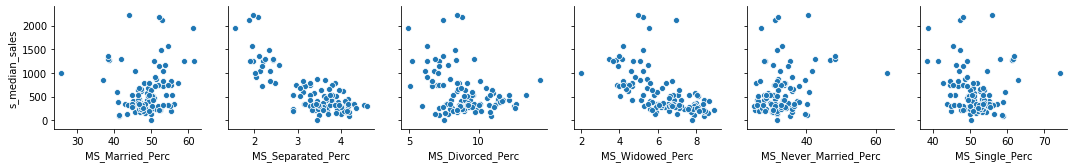

In [15]:
marstat = sns.pairplot(dfsales, 
                       x_vars=['MS_Married_Perc','MS_Separated_Perc','MS_Divorced_Perc','MS_Widowed_Perc','MS_Never_Married_Perc','MS_Single_Perc'], 
                       y_vars=['s_median_sales'])

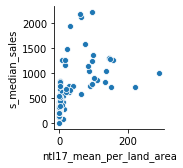

In [16]:
ntlight = sns.pairplot(dfsales, x_vars=['ntl17_mean_per_land_area'], y_vars=['s_median_sales'])

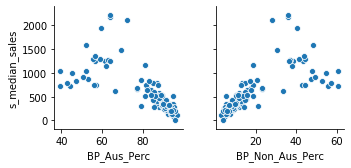

In [17]:
birthpl = sns.pairplot(dfsales, x_vars=['BP_Aus_Perc','BP_Non_Aus_Perc'], y_vars=['s_median_sales'])

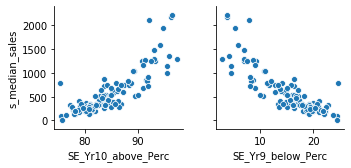

In [18]:
edu = sns.pairplot(dfsales, x_vars=['SE_Yr10_above_Perc','SE_Yr9_below_Perc'], y_vars=['s_median_sales'])

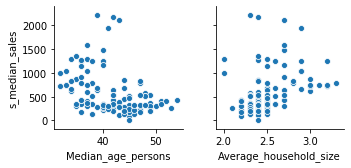

In [19]:
othcensus = sns.pairplot(dfsales, x_vars=['Median_age_persons','Average_household_size'], y_vars=['s_median_sales'])

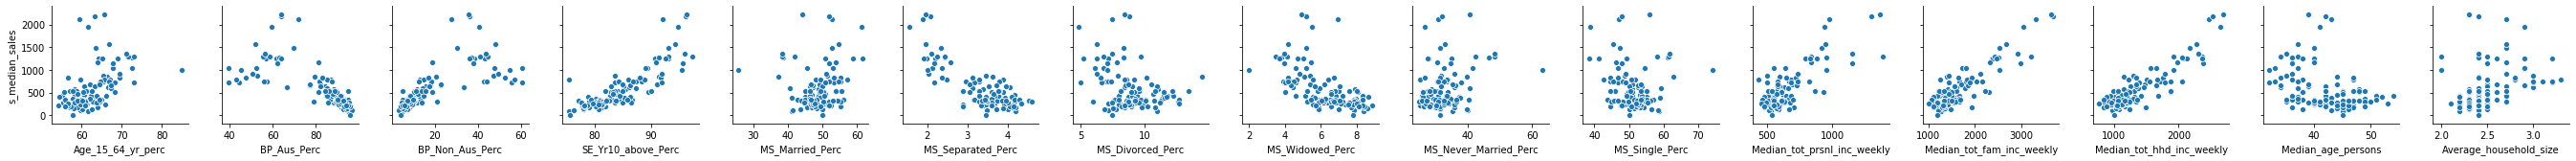

In [20]:
census = sns.pairplot(dfsales, x_vars=censuscols, y_vars=['s_median_sales'])

In [21]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha = 0.6, cmap = "coolwarm",
               vmin = -1, vmax = 1, transform = ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords = "axes fraction",
                ha = 'center', va = 'center', fontsize = font_size)
    
def corr_plot(df, cols):
    df_plot = df[cols]
    fig = sns.PairGrid(df_plot)
    fig.map_diag(plt.hist, bins = 12, edgecolor = "black")
    fig.map_lower(plt.scatter, edgecolor = "white")
    fig.map_upper(corrdot)
    return fig

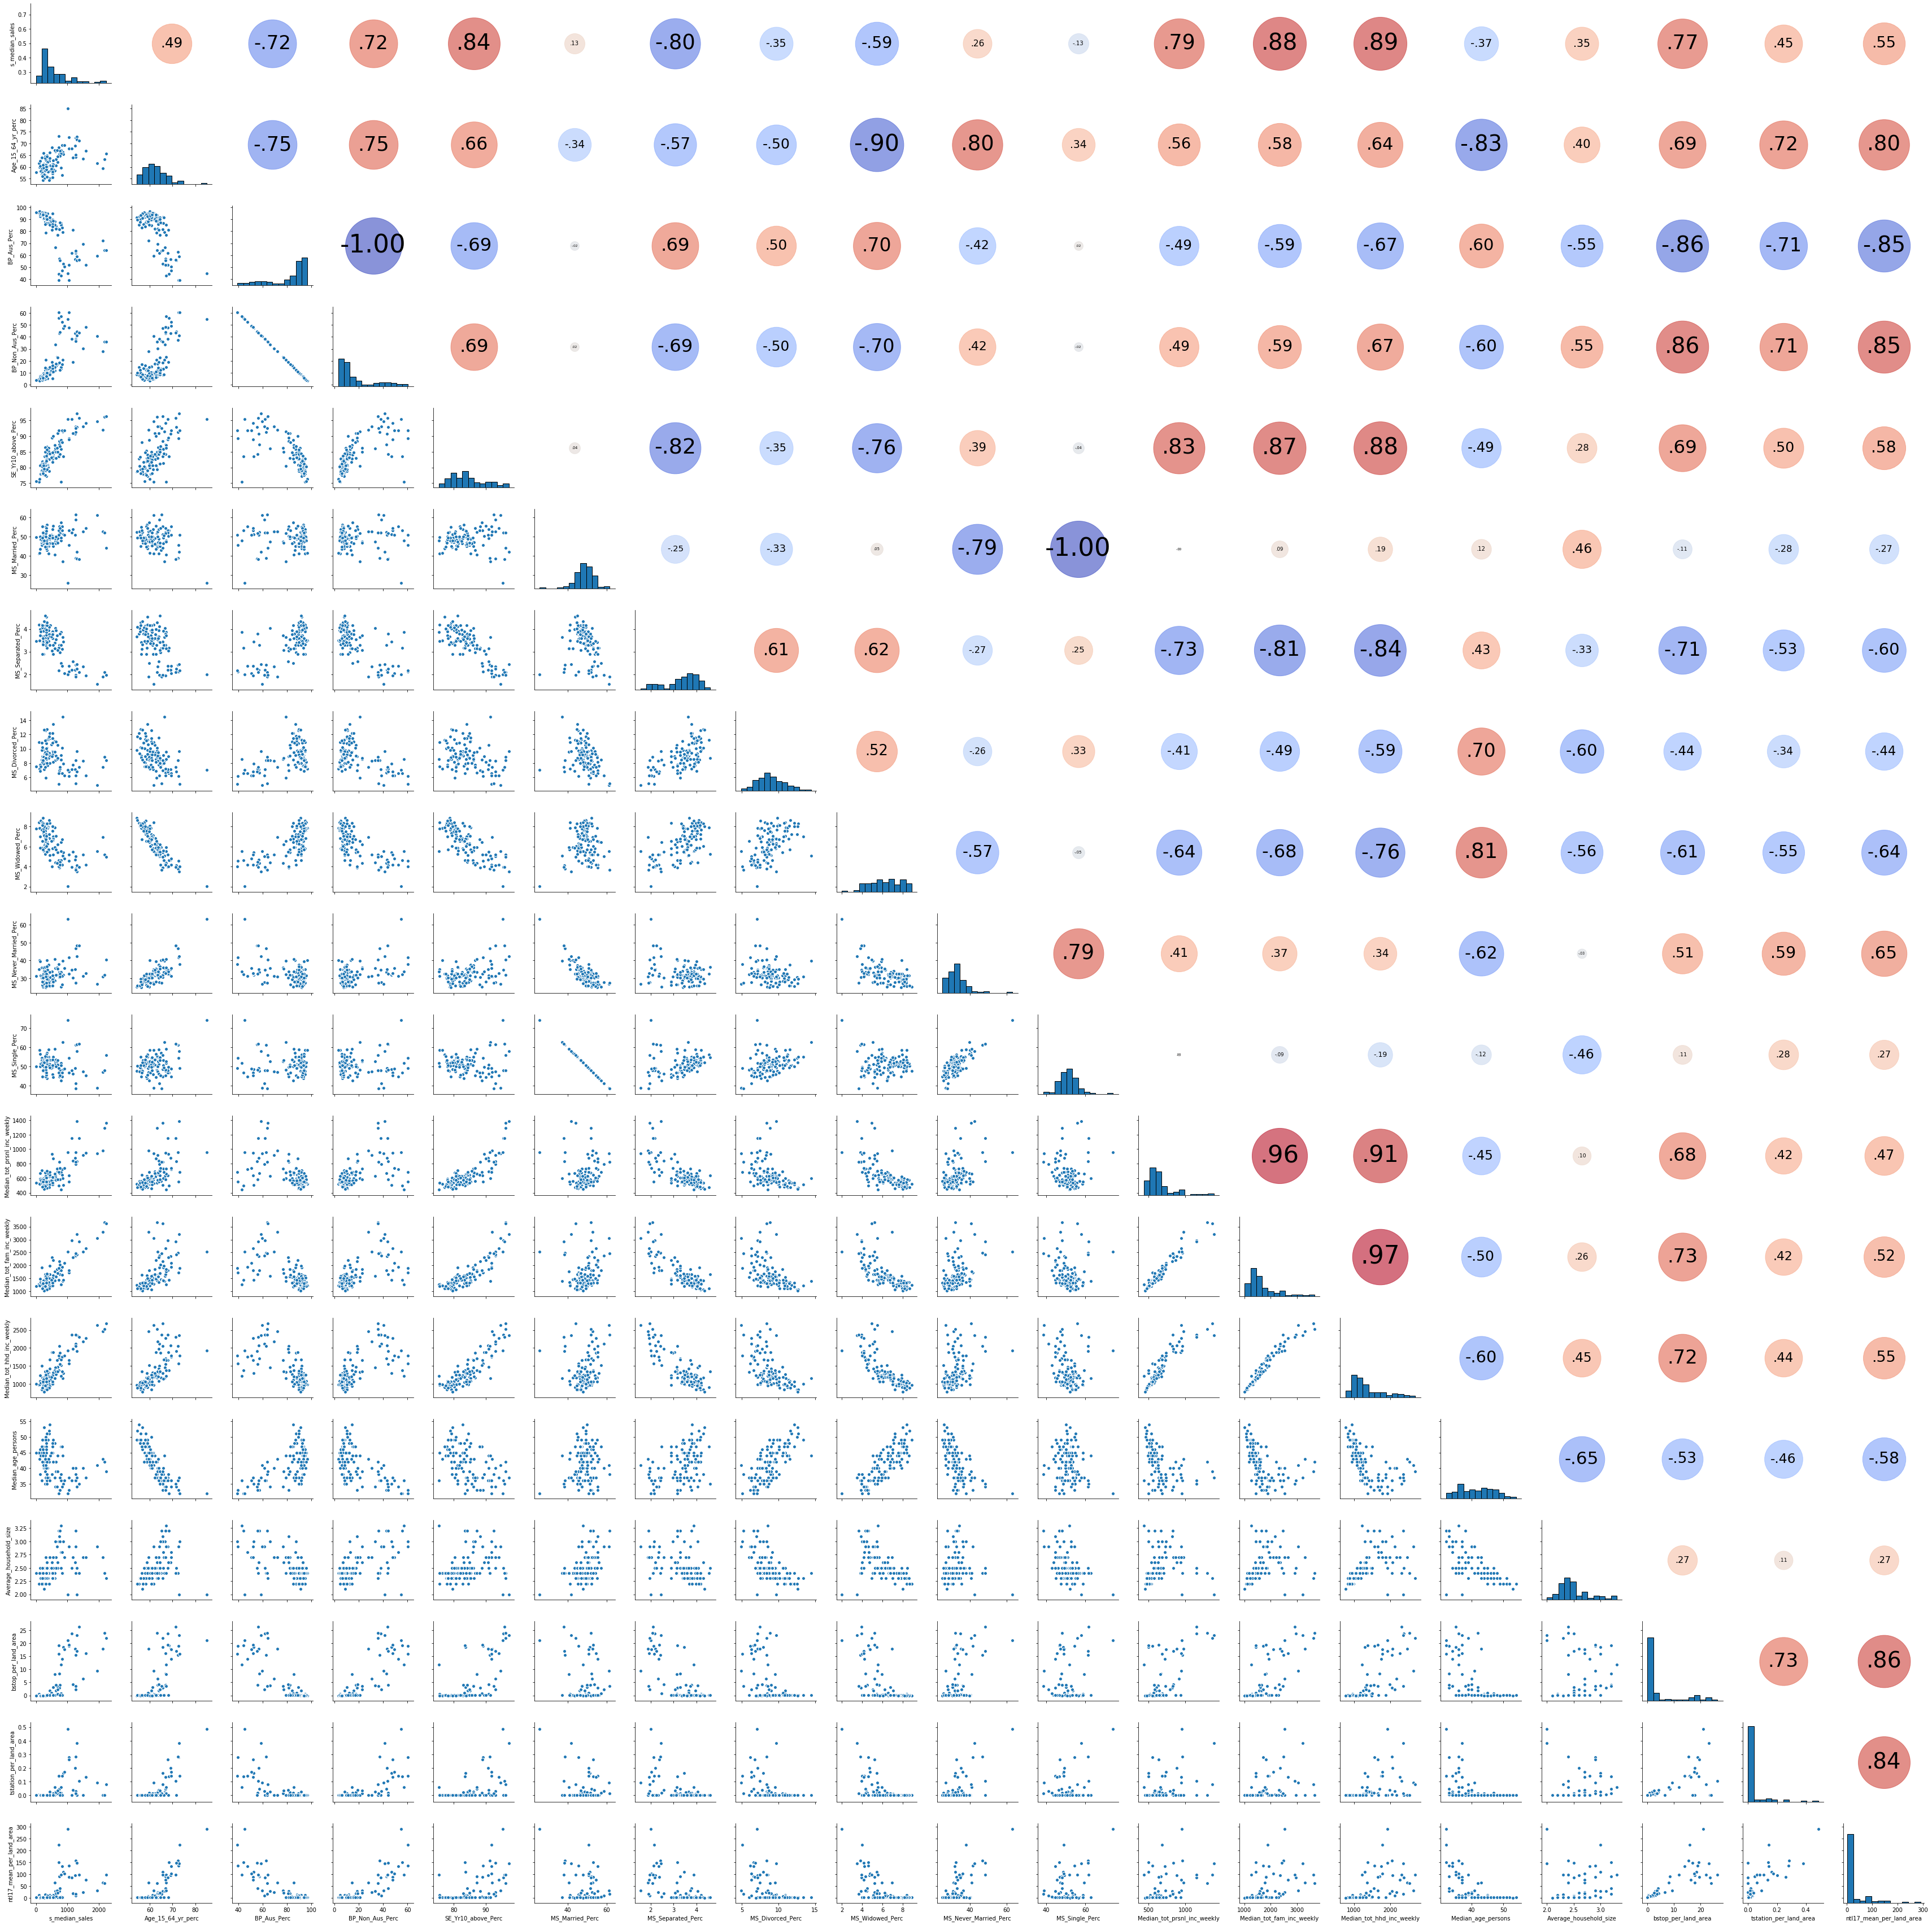

In [22]:
fullcols = salecols + featurecols
corr_plot(dfsales, fullcols)

#### Splitting the data with 75% of data for training the models and 25% of data for testing the models

In [23]:
train, test = train_test_split(dfsales, test_size=0.25, random_state=143)
print(train.shape)
print(test.shape)

(83, 175)
(28, 175)


#### Linear Regression test with age columns and median of sales

In [24]:
X_train = train[ageperccols]
y_train = train[salecols]
X_test = test[ageperccols]
y_test = test[salecols]

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained age data: ", rmse_train)
print("Mean Absolute Error of trained age data: ", mae_train)
print("R2 of trained age data: ", r2_train)

print("Root Mean Square Error of tested age data: ", rmse_test)
print("Mean Absolute Error of tested age data: ", mae_test)
print("R2 of tested age data: ", r2_test)

Root Mean Square Error of trained age data:  394.03302368884493
Mean Absolute Error of trained age data:  263.1866829311825
R2 of trained age data:  0.25615469131927726
Root Mean Square Error of tested age data:  395.88787728078734
Mean Absolute Error of tested age data:  258.54381631940015
R2 of tested age data:  0.1837823387445473


#### Linear Regression test with income columns and median of sales

In [25]:
X_train = train[incomecols]
y_train = train[salecols]
X_test = test[incomecols]
y_test = test[salecols]

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained income data: ", rmse_train)
print("Mean Absolute Error of trained income data: ", mae_train)
print("R2 of trained income data: ", r2_train)

print("Root Mean Square Error of tested income data: ", rmse_test)
print("Mean Absolute Error of tested income data: ", mae_test)
print("R2 of tested income data: ", r2_test)

Root Mean Square Error of trained income data:  185.51580471989843
Mean Absolute Error of trained income data:  141.49590882630113
R2 of trained income data:  0.8351157342003646
Root Mean Square Error of tested income data:  171.46831005888674
Mean Absolute Error of tested income data:  146.17723314047052
R2 of tested income data:  0.8468809180242003


#### Linear Regression test with transport columns and median of sales

In [26]:
X_train = train[transportcols]
y_train = train[salecols]
X_test = test[transportcols]
y_test = test[salecols]

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained transport data: ", rmse_train)
print("Mean Absolute Error of trained transport data: ", mae_train)
print("R2 of trained transport data: ", r2_train)

print("Root Mean Square Error of tested transport data: ", rmse_test)
print("Mean Absolute Error of tested transport data: ", mae_test)
print("R2 of tested transport data: ", r2_test)

Root Mean Square Error of trained transport data:  289.2379492073781
Mean Absolute Error of trained transport data:  202.29257299448196
R2 of trained transport data:  0.5991997969954925
Root Mean Square Error of tested transport data:  244.34962470412418
Mean Absolute Error of tested transport data:  189.14249420086387
R2 of tested transport data:  0.689054028874328


#### Linear Regression test with bus stop data and median of sales

In [27]:
X_train = train[transportcols]
X_train_1 = X_train.drop(columns = ['tstation_per_land_area'])
y_train = train[salecols]
X_test = test[transportcols]
X_test_1 = X_test.drop(columns = ['tstation_per_land_area'])
y_test = test[salecols]

lm = linear_model.LinearRegression()
lm.fit(X_train_1, y_train)
y_pred_train = lm.predict(X_train_1)
y_pred_test = lm.predict(X_test_1)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained bus stop data: ", rmse_train)
print("Mean Absolute Error of trained bus stop data: ", mae_train)
print("R2 of trained bus stop data: ", r2_train)

print("Root Mean Square Error of tested bus stop data: ", rmse_test)
print("Mean Absolute Error of tested bus stop data: ", mae_test)
print("R2 of tested bus stop data: ", r2_test)

Root Mean Square Error of trained bus stop data:  297.16486676873825
Mean Absolute Error of trained bus stop data:  208.22687959100261
R2 of trained bus stop data:  0.5769299222466763
Root Mean Square Error of tested bus stop data:  259.50167734352425
Mean Absolute Error of tested bus stop data:  196.93013695565432
R2 of tested bus stop data:  0.6492950303039478


#### Linear Regression test with train station data and median of sales

In [28]:
X_train = train[transportcols]
X_train_1 = X_train.drop(columns = ['bstop_per_land_area'])
y_train = train[salecols]
X_test = test[transportcols]
X_test_1 = X_test.drop(columns = ['bstop_per_land_area'])
y_test = test[salecols]

lm = linear_model.LinearRegression()
lm.fit(X_train_1, y_train)
y_pred_train = lm.predict(X_train_1)
y_pred_test = lm.predict(X_test_1)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained train station data: ", rmse_train)
print("Mean Absolute Error of trained train station data: ", mae_train)
print("R2 of trained train station data: ", r2_train)

print("Root Mean Square Error of tested train station data: ", rmse_test)
print("Mean Absolute Error of tested train station data: ", mae_test)
print("R2 of tested train station data: ", r2_test)

Root Mean Square Error of trained train station data:  398.08651379667026
Mean Absolute Error of trained train station data:  276.2270442125305
R2 of trained train station data:  0.24077182633026706
Root Mean Square Error of tested train station data:  439.7473883427717
Mean Absolute Error of tested train station data:  283.6339420234164
R2 of tested train station data:  -0.007089618655689467


#### Linear Regression test with night time lights column and median of sales

In [29]:
X_train = train[ntlightcols]
y_train = train[salecols]
X_test = test[ntlightcols]
y_test = test[salecols]

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained night time lights data: ", rmse_train)
print("Mean Absolute Error of trained night time lights data: ", mae_train)
print("R2 of trained night time lights data: ", r2_train)

print("Root Mean Square Error of tested night time lights data: ", rmse_test)
print("Mean Absolute Error of tested night time lights data: ", mae_test)
print("R2 of tested night time lights data: ", r2_test)

Root Mean Square Error of trained night time lights data:  370.90176320441606
Mean Absolute Error of trained night time lights data:  247.51869223506552
R2 of trained night time lights data:  0.34092447925532166
Root Mean Square Error of tested night time lights data:  401.94837451260435
Mean Absolute Error of tested night time lights data:  261.30039844395543
R2 of tested night time lights data:  0.15860072231654343


#### Linear Regression test with birth place columns and median of sales

In [30]:
X_train = train[birthplcols]
y_train = train[salecols]
X_test = test[birthplcols]
y_test = test[salecols]

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained birth place data: ", rmse_train)
print("Mean Absolute Error of trained birth place data: ", mae_train)
print("R2 of trained birth place data: ", r2_train)

print("Root Mean Square Error of tested birth place data: ", rmse_test)
print("Mean Absolute Error of tested birth place data: ", mae_test)
print("R2 of tested birth place data: ", r2_test)

Root Mean Square Error of trained birth place data:  410.9136916605637
Mean Absolute Error of trained birth place data:  289.96630769354465
R2 of trained birth place data:  0.19105571700494473
Root Mean Square Error of tested birth place data:  381.74012187023203
Mean Absolute Error of tested birth place data:  244.35664034721927
R2 of tested birth place data:  0.24107790471869306


#### Linear Regression test with secondary education columns and median of sales

In [31]:
X_train = train[educols]
y_train = train[salecols]
X_test = test[educols]
y_test = test[salecols]

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained secondary education data: ", rmse_train)
print("Mean Absolute Error of trained secondary education data: ", mae_train)
print("R2 of trained secondary education data: ", r2_train)

print("Root Mean Square Error of tested secondary education data: ", rmse_test)
print("Mean Absolute Error of tested secondary education data: ", mae_test)
print("R2 of tested secondary education data: ", r2_test)

Root Mean Square Error of trained secondary education data:  355.8857245804017
Mean Absolute Error of trained secondary education data:  237.26385493765812
R2 of trained secondary education data:  0.3932098515036082
Root Mean Square Error of tested secondary education data:  365.85216098828465
Mean Absolute Error of tested secondary education data:  207.94493552280105
R2 of tested secondary education data:  0.30293571652585716


#### Linear Regression test with marital status columns and median of sales

In [32]:
X_train = train[maritalstatcols]
y_train = train[salecols]
X_test = test[maritalstatcols]
y_test = test[salecols]

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained marital status data: ", rmse_train)
print("Mean Absolute Error of trained marital status data: ", mae_train)
print("R2 of trained marital status data: ", r2_train)

print("Root Mean Square Error of tested marital status data: ", rmse_test)
print("Mean Absolute Error of tested marital status data: ", mae_test)
print("R2 of tested marital status data: ", r2_test)

Root Mean Square Error of trained marital status data:  336.2771161186182
Mean Absolute Error of trained marital status data:  221.02390568521264
R2 of trained marital status data:  0.4582336656432151
Root Mean Square Error of tested marital status data:  504.7006746850673
Mean Absolute Error of tested marital status data:  257.9262757327004
R2 of tested marital status data:  -0.3265674965359484


#### Linear Regression test with other census columns and median of sales

In [33]:
X_train = train[othercensuscols]
y_train = train[salecols]
X_test = test[othercensuscols]
y_test = test[salecols]

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained other census data: ", rmse_train)
print("Mean Absolute Error of trained other census data: ", mae_train)
print("R2 of trained other census data: ", r2_train)

print("Root Mean Square Error of tested other census data: ", rmse_test)
print("Mean Absolute Error of tested other census data: ", mae_test)
print("R2 of tested other census data: ", r2_test)

Root Mean Square Error of trained other census data:  414.2406378021949
Mean Absolute Error of trained other census data:  296.57576248014186
R2 of trained other census data:  0.17790351899424905
Root Mean Square Error of tested other census data:  423.61552964360465
Mean Absolute Error of tested other census data:  299.06901449339773
R2 of tested other census data:  0.06544400627368152


#### Linear Regression test with all census columns and median of sales

In [34]:
X_train = train[censuscols]
y_train = train[salecols]
X_test = test[censuscols]
y_test = test[salecols]

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained census data: ", rmse_train)
print("Mean Absolute Error of trained census data: ", mae_train)
print("R2 of trained census data: ", r2_train)

print("Root Mean Square Error of tested census data: ", rmse_test)
print("Mean Absolute Error of tested census data: ", mae_test)
print("R2 of tested census data: ", r2_test)

Root Mean Square Error of trained census data:  93.27430753229467
Mean Absolute Error of trained census data:  71.04213681226311
R2 of trained census data:  0.9583186810944575
Root Mean Square Error of tested census data:  106.26138657639224
Mean Absolute Error of tested census data:  85.15660427527762
R2 of tested census data:  0.9411952323063355


#### Linear Regression test with all features collected and median of sales

In [35]:
X_train = train[featurecols]
y_train = train[salecols]
X_test = test[featurecols]
y_test = test[salecols]

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained all features data: ", rmse_train)
print("Mean Absolute Error of trained all features data: ", mae_train)
print("R2 of trained all features data: ", r2_train)

print("Root Mean Square Error of tested all features data: ", rmse_test)
print("Mean Absolute Error of tested all features data: ", mae_test)
print("R2 of tested all features data: ", r2_test)

Root Mean Square Error of trained all features data:  87.3765693770347
Mean Absolute Error of trained all features data:  67.81116002093796
R2 of trained all features data:  0.9634230604883084
Root Mean Square Error of tested all features data:  104.6858598633284
Mean Absolute Error of tested all features data:  81.83321150663107
R2 of tested all features data:  0.9429260894037756


#### Using RFE to find the best 5 features to select for prediction

In [36]:
X_train = train[ageperccols + eduperccols + incomecols + transportcols]
y_train = train[salecols]
X_test = test[ageperccols + eduperccols + incomecols + transportcols]
y_test = test[salecols]

model = linear_model.LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

features_bool = np.array(rfe.support_)
features = np.array(X_train.columns)
print("The best 5 features selected are ", features[features_bool])
print("The coefficients of the selected features are ", rfe.estimator_.coef_)

The best 5 features selected are  ['Age_15_64_yr_perc' 'SE_Yr10_above_Perc' 'Median_tot_prsnl_inc_weekly'
 'bstop_per_land_area' 'tstation_per_land_area']
The coefficients of the selected features are  [-2.63002512e+01  5.45185037e+01  2.14632509e-01  3.32793847e+01
 -7.37090839e+02]


/Users/jeromeroosan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
y_rfepred_train = rfe.predict(X_train)
y_rfepred_test = rfe.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_rfepred_train))
mae_train = mean_absolute_error(y_train, y_rfepred_train)
r2_train = r2_score(y_train, y_rfepred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_rfepred_test))
mae_test = mean_absolute_error(y_test, y_rfepred_test)
r2_test = r2_score(y_test, y_rfepred_test)

print("Root Mean Square Error of trained best 5 features data: ", rmse_train)
print("Mean Absolute Error of trained best 5 features data: ", mae_train)
print("R2 of trained best 5 features data: ", r2_train)

print("Root Mean Square Error of tested best 5 features data: ", rmse_test)
print("Mean Absolute Error of tested best 5 features data: ", mae_test)
print("R2 of tested best 5 features data: ", r2_test)

Root Mean Square Error of trained best 5 features data:  195.94418488517985
Mean Absolute Error of trained best 5 features data:  138.0434264198584
R2 of trained best 5 features data:  0.8160574748259444
Root Mean Square Error of tested best 5 features data:  142.2405575489863
Mean Absolute Error of tested best 5 features data:  115.909299671517
R2 of tested best 5 features data:  0.8946320639020588


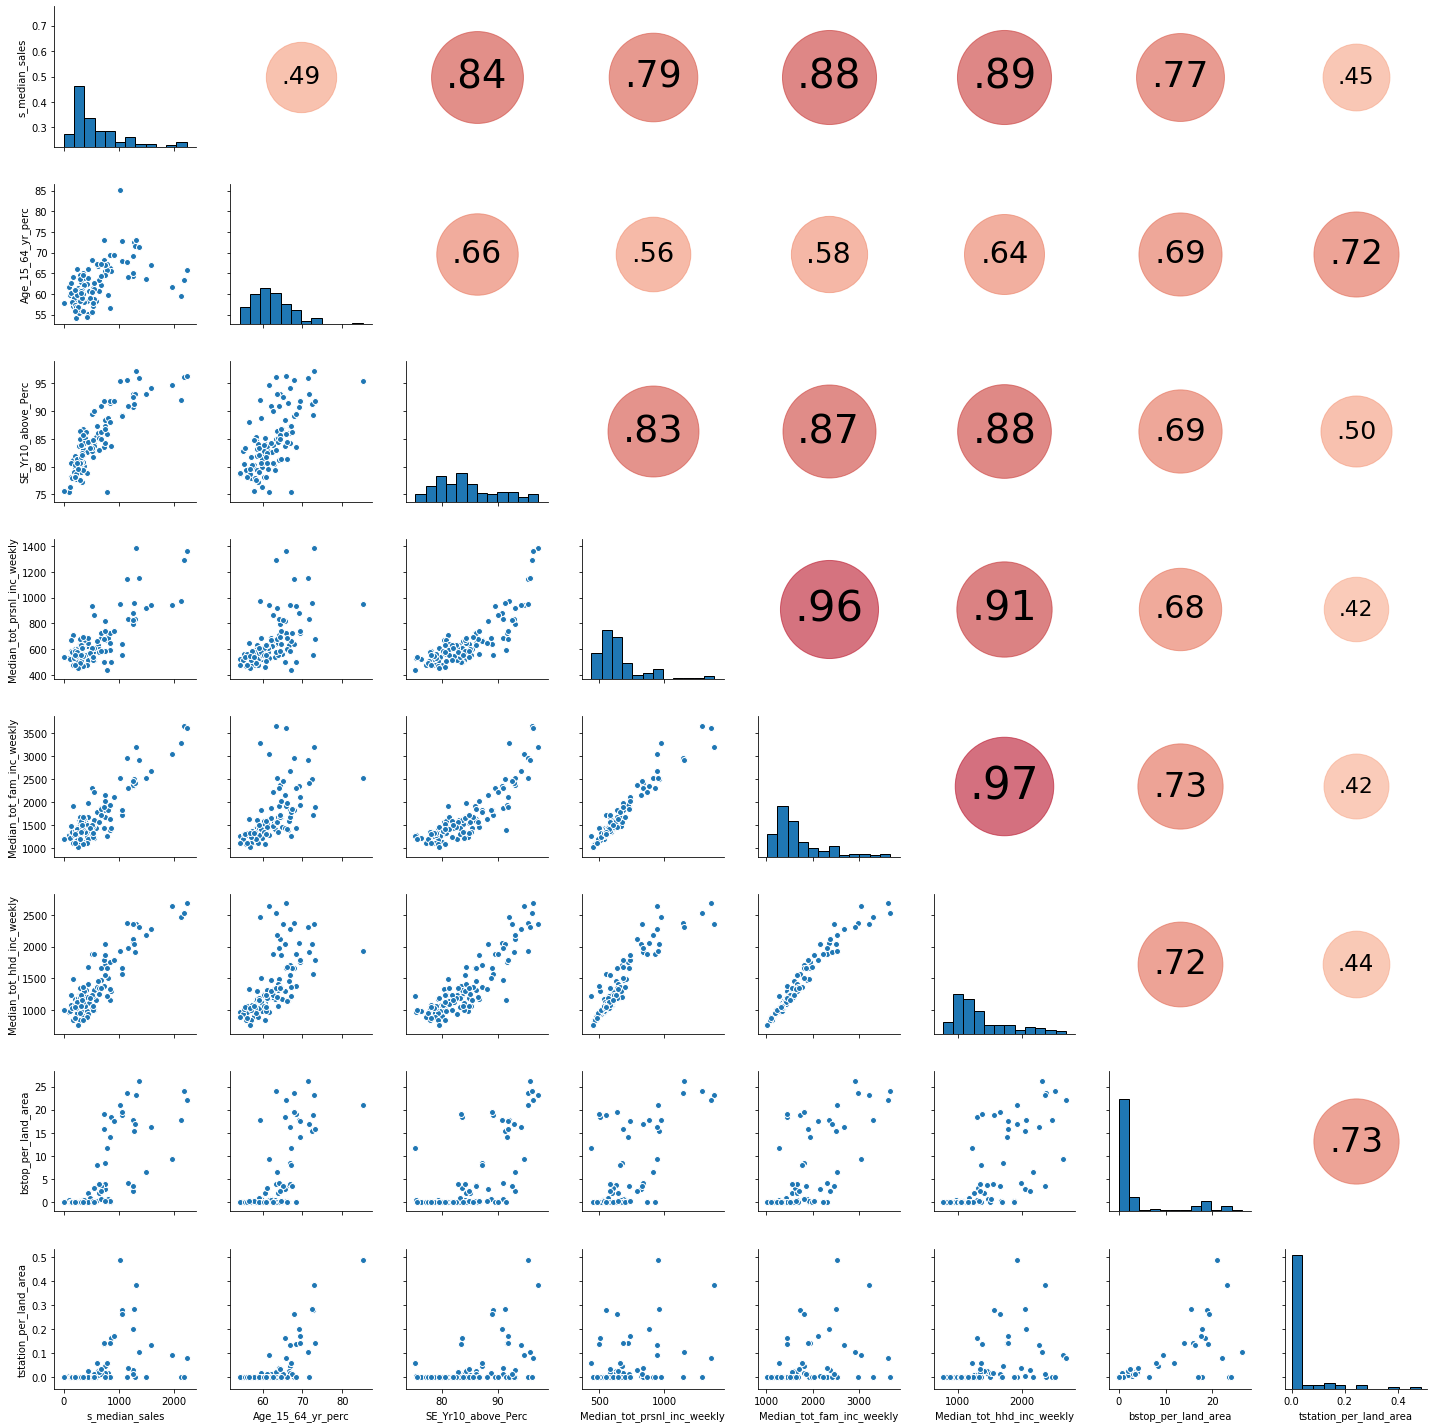

In [38]:
selcols = ageperccols + eduperccols + incomecols + transportcols
fullcols = salecols + selcols
corr_plot(dfsales, fullcols)

### Analysis of the house sales by dwelling type - Strata vs Non Strata
##### Strata type houses include Flats, Units, Townhouses etc. whereas Non-Strata type is mainly referring to Individual Houses.

In [39]:
lgacols = ['LGA_CODE','LGA_NAME']
agecols = ['Age_below_15_yr','Age_15_64_yr','Age_over_65_yr']
ageperccols = ['Age_15_64_yr_perc']
birthplcols = ['BP_Aus','BP_Non_Aus']
birthplperccols = ['BP_Aus_Perc','BP_Non_Aus_Perc']
educols = ['SE_Yr10_above','SE_Yr9_below']
eduperccols = ['SE_Yr10_above_Perc']
maritalstatcols = ['MS_Married','MS_Separated','MS_Divorced','MS_Widowed','MS_Never_Married','MS_Single']
maritalstatperccols = ['MS_Married_Perc','MS_Separated_Perc','MS_Divorced_Perc','MS_Widowed_Perc','MS_Never_Married_Perc','MS_Single_Perc']
incomecols = ['Median_tot_prsnl_inc_weekly','Median_tot_fam_inc_weekly','Median_tot_hhd_inc_weekly']
othercensuscols = ['Median_age_persons','Average_household_size']
transportcols = ['bstop_per_land_area','tstation_per_land_area']
buscols = ['bstop_per_land_area']
traincols = ['tstation_per_land_area']
ntlightcols = ['ntl17_mean_per_land_area']
salecols = ['s_median_nonstrata','s_median_strata']

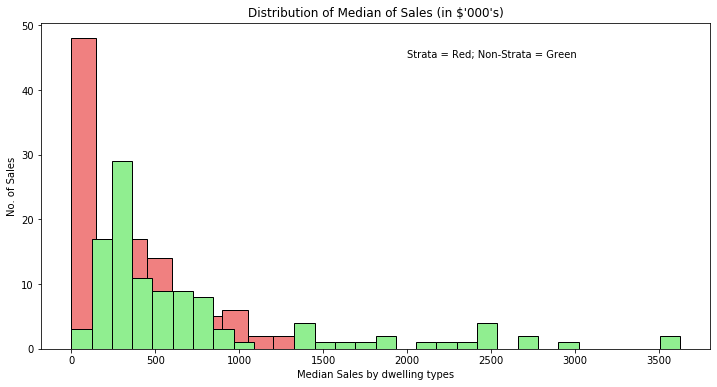

In [40]:
plt.figure(figsize=(12,6))
plt.hist(dfsales['s_median_strata'], color = 'lightcoral', edgecolor = 'black', bins = 10)
plt.hist(dfsales['s_median_nonstrata'], color = 'lightgreen',edgecolor = 'black', bins = 30)
plt.text(2000, 45, "Strata = Red; Non-Strata = Green")
plt.xlabel("Median Sales by dwelling types")
plt.ylabel("No. of Sales")
plt.title("Distribution of Median of Sales (in $'000's)")
plt.show()

#### Checking the relationship for comparing both type of dwellings

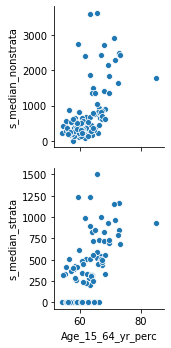

In [41]:
age = sns.pairplot(dfsales, 
                   x_vars=ageperccols, 
                   y_vars=salecols)

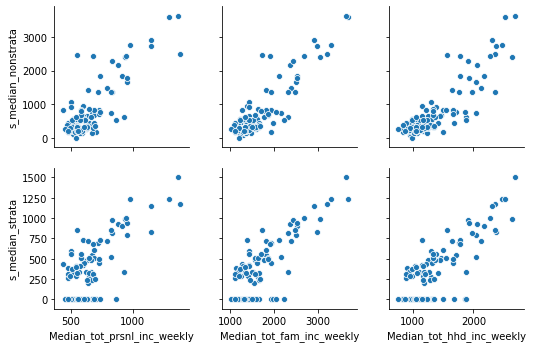

In [42]:
income = sns.pairplot(dfsales, 
                      x_vars=incomecols, 
                      y_vars=salecols)

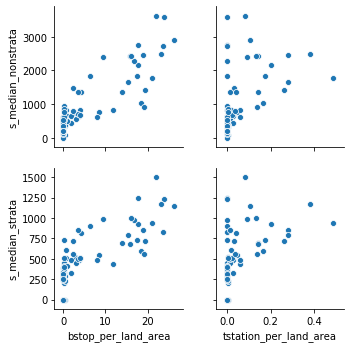

In [43]:
transp = sns.pairplot(dfsales, 
                      x_vars=transportcols, 
                      y_vars=salecols)

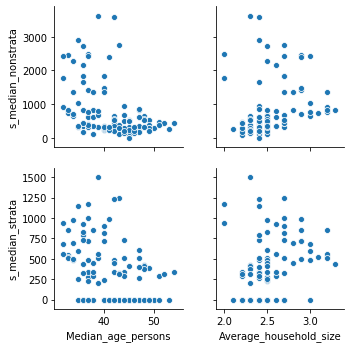

In [44]:
othcensus = sns.pairplot(dfsales, 
                         x_vars=othercensuscols, 
                         y_vars=salecols)

#### Splitting the data by dwelling types - Strata and Non-Strata

In [45]:
dfsales = dfsales[lgacols + salecols + ageperccols + incomecols + othercensuscols + transportcols + ntlightcols]
dfsales.head()

,LGA_CODE,LGA_NAME,s_median_nonstrata,s_median_strata,Age_15_64_yr_perc,Median_tot_prsnl_inc_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,Median_age_persons,Average_household_size,bstop_per_land_area,tstation_per_land_area,ntl17_mean_per_land_area
0,LGA10050,Albury,320.0,206.0,63.275332,642,1532,1185,39,2.3,0.294170,0.003269,13.711019
1,LGA10130,Armidale Regional,352.5,0.0,64.937358,561,1465,1173,36,2.4,0.001972,0.000116,1.139977
2,LGA10250,Ballina,639.5,424.0,58.386580,601,1426,1156,48,2.3,0.123727,0.000000,3.293157
4,LGA10470,Bathurst Regional,417.0,280.0,63.943239,646,1632,1310,37,2.5,0.035622,0.000262,1.866140
5,LGA10550,Bega Valley,460.0,285.0,58.306013,538,1242,986,51,2.2,0.012582,0.000000,1.156571


In [46]:
sales_dwelling = dfsales.melt(id_vars = ['LGA_CODE'], value_vars = ['s_median_nonstrata','s_median_strata'])
sales_dwelling = sales_dwelling[sales_dwelling.value > 0]
salesbydwelling = dfsales.merge(sales_dwelling, on = 'LGA_CODE', how = 'inner')
salesbydwelling = salesbydwelling.rename(columns = {'variable' : 'DwellingType', 'value' : 'sales_median'})
salesbydwelling = salesbydwelling.drop(columns = ['s_median_nonstrata','s_median_strata'])
salesbydwelling.head()

,LGA_CODE,LGA_NAME,Age_15_64_yr_perc,Median_tot_prsnl_inc_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,Median_age_persons,Average_household_size,bstop_per_land_area,tstation_per_land_area,ntl17_mean_per_land_area,DwellingType,sales_median
0,LGA10050,Albury,63.275332,642,1532,1185,39,2.3,0.294170,0.003269,13.711019,s_median_nonstrata,320.0
1,LGA10050,Albury,63.275332,642,1532,1185,39,2.3,0.294170,0.003269,13.711019,s_median_strata,206.0
2,LGA10130,Armidale Regional,64.937358,561,1465,1173,36,2.4,0.001972,0.000116,1.139977,s_median_nonstrata,352.5
3,LGA10250,Ballina,58.386580,601,1426,1156,48,2.3,0.123727,0.000000,3.293157,s_median_nonstrata,639.5
4,LGA10250,Ballina,58.386580,601,1426,1156,48,2.3,0.123727,0.000000,3.293157,s_median_strata,424.0


DwellingType sales_median                                          \
                             count        mean         std    min      25%   
0  s_median_nonstrata        110.0  765.555805  786.928322   87.5  288.125   
1     s_median_strata         63.0  585.609730  297.101295  206.0  336.750   

                          
     50%     75%     max  
0  438.5  823.75  3625.0  
1  507.5  763.00  1500.0

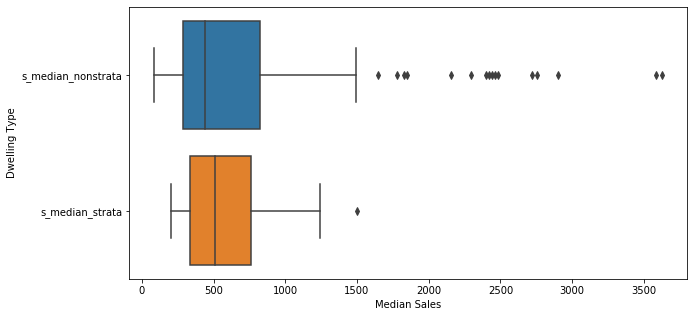

In [47]:
plt.figure(figsize = (10, 5))
ax = sns.boxplot(x = 'sales_median', y = 'DwellingType', data = salesbydwelling)
ax.set(xlabel = 'Median Sales', ylabel = 'Dwelling Type')
salesbydwelling[['DwellingType', 'sales_median']].groupby('DwellingType').describe().reset_index()

#### Regression testing

In [48]:
train, test = train_test_split(salesbydwelling, stratify = salesbydwelling['DwellingType'])
X_train = train.drop(columns = ['sales_median'])
y_train = train['sales_median']
X_test = test.drop(columns = ['sales_median'])
y_test = test['sales_median']

print("Train shape: ", train.shape)
print("Test shape: ", test.shape)

Train shape:  (129, 13)
Test shape:  (44, 13)


In [49]:
dtrain = pd.get_dummies(X_train.DwellingType, drop_first = True)
dtest = pd.get_dummies(X_test.DwellingType, drop_first = True)
X_train = X_train.merge(dtrain, how = 'inner', left_index = True, right_index = True)
X_test = X_test.merge(dtest, how = 'inner', left_index = True, right_index = True)

In [50]:
X_train.head()

,LGA_CODE,LGA_NAME,Age_15_64_yr_perc,Median_tot_prsnl_inc_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,Median_age_persons,Average_household_size,bstop_per_land_area,tstation_per_land_area,ntl17_mean_per_land_area,DwellingType,s_median_strata
116,LGA16260,Parramatta,69.422814,722,1933,1759,34,2.8,14.028491,0.143148,133.205896,s_median_nonstrata,0
164,LGA18250,Willoughby,66.910686,946,2671,2271,37,2.7,16.186714,0.133774,76.965371,s_median_strata,1
136,LGA17000,Singleton,66.138924,684,1981,1682,36,2.7,0.035359,0.000204,2.938737,s_median_nonstrata,0
101,LGA15650,Muswellbrook,64.512119,640,1665,1346,35,2.5,0.012629,0.000294,2.315318,s_median_nonstrata,0
107,LGA15900,Newcastle,67.234834,660,1778,1368,37,2.4,8.058691,0.058901,63.166855,s_median_strata,1


In [51]:
stratacol = ['s_median_strata']

In [52]:
X_train_age = X_train[ageperccols + stratacol]
X_train_income = X_train[incomecols + stratacol]
X_train_othercensus = X_train[othercensuscols + stratacol]
X_train_trans = X_train[transportcols + stratacol]
X_train_bus = X_train[buscols + stratacol]
X_train_train = X_train[traincols + stratacol]
X_train_ntl = X_train[ntlightcols + stratacol]
X_train_all = X_train[ageperccols + incomecols + othercensuscols + transportcols + ntlightcols]

X_test_age = X_test[ageperccols + stratacol]
X_test_income = X_test[incomecols + stratacol]
X_test_othercensus = X_test[othercensuscols + stratacol]
X_test_trans = X_test[transportcols + stratacol]
X_test_ntl = X_test[ntlightcols + stratacol]
X_test_bus = X_test[buscols + stratacol]
X_test_train = X_test[traincols + stratacol]
X_test_all = X_test[ageperccols + incomecols + othercensuscols + transportcols + ntlightcols]

#### Linear Regression on Age data

In [53]:
X_train = X_train_age
y_train = train['sales_median']
X_test = X_test_age
y_test = test['sales_median']

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained age data by dwelling type: ", rmse_train)
print("Mean Absolute Error of trained age data by dwelling type: ", mae_train)
print("R2 of trained age data by dwelling type: ", r2_train)

print("Root Mean Square Error of tested age data by dwelling type: ", rmse_test)
print("Mean Absolute Error of tested age data by dwelling type: ", mae_test)
print("R2 of tested age data by dwelling type: ", r2_test)

Root Mean Square Error of trained age data by dwelling type:  584.6871660612013
Mean Absolute Error of trained age data by dwelling type:  382.950493414899
R2 of trained age data by dwelling type:  0.24454647789215012
Root Mean Square Error of tested age data by dwelling type:  467.9335561568477
Mean Absolute Error of tested age data by dwelling type:  354.42734633096677
R2 of tested age data by dwelling type:  0.3938144011638226


#### Linear Regression on Income data

In [54]:
X_train = X_train_income
y_train = train['sales_median']
X_test = X_test_income
y_test = test['sales_median']

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained income data by dwelling type: ", rmse_train)
print("Mean Absolute Error of trained income data by dwelling type: ", mae_train)
print("R2 of trained income data by dwelling type: ", r2_train)

print("Root Mean Square Error of tested income data by dwelling type: ", rmse_test)
print("Mean Absolute Error of tested income data by dwelling type: ", mae_test)
print("R2 of tested income data by dwelling type: ", r2_test)

Root Mean Square Error of trained income data by dwelling type:  353.58447508456516
Mean Absolute Error of trained income data by dwelling type:  264.21039418298153
R2 of trained income data by dwelling type:  0.7237215541934969
Root Mean Square Error of tested income data by dwelling type:  487.1543994474192
Mean Absolute Error of tested income data by dwelling type:  339.030226060126
R2 of tested income data by dwelling type:  0.3429922503664753


#### Linear Regression on Other census data

In [55]:
X_train = X_train_othercensus
y_train = train['sales_median']
X_test = X_test_othercensus
y_test = test['sales_median']

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained other census data by dwelling type: ", rmse_train)
print("Mean Absolute Error of trained other census data by dwelling type: ", mae_train)
print("R2 of trained other census data by dwelling type: ", r2_train)

print("Root Mean Square Error of tested other census data by dwelling type: ", rmse_test)
print("Mean Absolute Error of tested other census data by dwelling type: ", mae_test)
print("R2 of tested other census data by dwelling type: ", r2_test)

Root Mean Square Error of trained other census data by dwelling type:  627.7065299101165
Mean Absolute Error of trained other census data by dwelling type:  423.4427401294313
R2 of trained other census data by dwelling type:  0.12928922038879587
Root Mean Square Error of tested other census data by dwelling type:  531.8537460592698
Mean Absolute Error of tested other census data by dwelling type:  400.94095526462917
R2 of tested other census data by dwelling type:  0.2168919663344936


#### Linear Regression on Transport data

In [56]:
X_train = X_train_trans
y_train = train['sales_median']
X_test = X_test_trans
y_test = test['sales_median']

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained transport data by dwelling type: ", rmse_train)
print("Mean Absolute Error of trained transport data by dwelling type: ", mae_train)
print("R2 of trained transport data by dwelling type: ", r2_train)

print("Root Mean Square Error of tested transport data by dwelling type: ", rmse_test)
print("Mean Absolute Error of tested transport data by dwelling type: ", mae_test)
print("R2 of tested transport data by dwelling type: ", r2_test)

Root Mean Square Error of trained transport data by dwelling type:  407.4786594333506
Mean Absolute Error of trained transport data by dwelling type:  310.2992288732811
R2 of trained transport data by dwelling type:  0.6330808612392027
Root Mean Square Error of tested transport data by dwelling type:  351.61457681678365
Mean Absolute Error of tested transport data by dwelling type:  283.35807561942096
R2 of tested transport data by dwelling type:  0.6577283119443157


#### Linear Regression on Bus data

In [57]:
X_train = X_train_bus
y_train = train['sales_median']
X_test = X_test_bus
y_test = test['sales_median']

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained transport data by dwelling type: ", rmse_train)
print("Mean Absolute Error of trained transport data by dwelling type: ", mae_train)
print("R2 of trained transport data by dwelling type: ", r2_train)

print("Root Mean Square Error of tested transport data by dwelling type: ", rmse_test)
print("Mean Absolute Error of tested transport data by dwelling type: ", mae_test)
print("R2 of tested transport data by dwelling type: ", r2_test)

Root Mean Square Error of trained transport data by dwelling type:  420.3753403095181
Mean Absolute Error of trained transport data by dwelling type:  321.02545155675466
R2 of trained transport data by dwelling type:  0.6094873633323602
Root Mean Square Error of tested transport data by dwelling type:  340.78576702521343
Mean Absolute Error of tested transport data by dwelling type:  271.75441425742383
R2 of tested transport data by dwelling type:  0.6784858209274018


#### Linear Regression on Train data

In [58]:
X_train = X_train_train
y_train = train['sales_median']
X_test = X_test_train
y_test = test['sales_median']

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained transport data by dwelling type: ", rmse_train)
print("Mean Absolute Error of trained transport data by dwelling type: ", mae_train)
print("R2 of trained transport data by dwelling type: ", r2_train)

print("Root Mean Square Error of tested transport data by dwelling type: ", rmse_test)
print("Mean Absolute Error of tested transport data by dwelling type: ", mae_test)
print("R2 of tested transport data by dwelling type: ", r2_test)

Root Mean Square Error of trained transport data by dwelling type:  604.9794248971156
Mean Absolute Error of trained transport data by dwelling type:  369.90786468871494
R2 of trained transport data by dwelling type:  0.19119870582656073
Root Mean Square Error of tested transport data by dwelling type:  478.4755282853271
Mean Absolute Error of tested transport data by dwelling type:  368.72376740607507
R2 of tested transport data by dwelling type:  0.36619349017454916


#### Linear Regression on Night time lights data

In [59]:
X_train = X_train_ntl
y_train = train['sales_median']
X_test = X_test_ntl
y_test = test['sales_median']

lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Root Mean Square Error of trained night time lights data by dwelling type: ", rmse_train)
print("Mean Absolute Error of trained night time lights data by dwelling type: ", mae_train)
print("R2 of trained night time lights data by dwelling type: ", r2_train)

print("Root Mean Square Error of tested night time lights data by dwelling type: ", rmse_test)
print("Mean Absolute Error of tested night time lights data by dwelling type: ", mae_test)
print("R2 of tested night time lights data by dwelling type: ", r2_test)

Root Mean Square Error of trained night time lights data by dwelling type:  559.8357185414445
Mean Absolute Error of trained night time lights data by dwelling type:  365.02891813449867
R2 of trained night time lights data by dwelling type:  0.30740103910498007
Root Mean Square Error of tested night time lights data by dwelling type:  394.9154442004339
Mean Absolute Error of tested night time lights data by dwelling type:  304.7572102974748
R2 of tested night time lights data by dwelling type:  0.5682369520716031


#### Using RFE to find the best 5 features to select for prediction of sales by dwelling type

In [60]:
X_train = X_train_all
y_train = train['sales_median']
X_test = X_test_all
y_test = test['sales_median']

model = linear_model.LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

features_bool = np.array(rfe.support_)
features = np.array(X_train.columns)
print("The best 5 features selected are ", features[features_bool])
print("The coefficients of the selected features are ", rfe.estimator_.coef_)

The best 5 features selected are  ['Median_tot_prsnl_inc_weekly' 'Median_age_persons'
 'Average_household_size' 'bstop_per_land_area' 'tstation_per_land_area']
The coefficients of the selected features are  [   1.81675106   38.25706253  423.53786663   44.74410073 -605.90158433]


In [61]:
y_rfepred_train = rfe.predict(X_train)
y_rfepred_test = rfe.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_rfepred_train))
mae_train = mean_absolute_error(y_train, y_rfepred_train)
r2_train = r2_score(y_train, y_rfepred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_rfepred_test))
mae_test = mean_absolute_error(y_test, y_rfepred_test)
r2_test = r2_score(y_test, y_rfepred_test)

print("Root Mean Square Error of trained best 3 features data: ", rmse_train)
print("Mean Absolute Error of trained best 3 features data: ", mae_train)
print("R2 of trained best 3 features data: ", r2_train)

print("Root Mean Square Error of tested best 3 features data: ", rmse_test)
print("Mean Absolute Error of tested best 3 features data: ", mae_test)
print("R2 of tested best 3 features data: ", r2_test)

Root Mean Square Error of trained best 3 features data:  370.70176874404603
Mean Absolute Error of trained best 3 features data:  239.1863192190537
R2 of trained best 3 features data:  0.6963243676831381
Root Mean Square Error of tested best 3 features data:  454.8085042886213
Mean Absolute Error of tested best 3 features data:  277.18561881720495
R2 of tested best 3 features data:  0.42734324512817634
